## Sentiment Analysis

Pacman's Retirement Sentiment Analysis

### METHODOLOGY
---
- Data Collection
   - The YouTube reviews were collected from every different channel like ESPN. etc.
- Data Exploration
   - The dataset have 1792 rows and 4 columns
   - Doesn't have a missing values
- Data Cleaning
   - Removed unnecessary data
   - Removed punctuation marks
   - Used NLTK library to filter unnecessary text like stopwords
- Data Visualization
   - Used table chart to identify the top words and top sentences
   - also, used wordcloud for more visualization



In [ ]:
import pandas as pd
from collections import Counter

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

#Stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [8]:
df = pd.read_csv('Combined-reviews.csv')
df.head()

,Author,Comment Posted,Content,Like
0,legendary351,1 week ago,What a legend he is. Glad it was on my era,60
1,redghettosun,1 week ago,The Last of the True Greats. You can't make up...,32
2,Hassan Abykhres,1 week ago,I’m glad I witnessed such a talent in my years...,13
3,Mansoor,1 week ago,Mannys been a pro boxer for a very long time. ...,11
4,Renz Caringal,1 week ago,"Nov. 15, 2003 when I first watched Manny vs Ba...",16


In [9]:
df.shape

(1792, 4)

In [11]:
for column in df.columns:
    print(f'{column} - {round(np.mean(df[column].isnull()) * 100)}%')

Author - 0%
Comment Posted - 0%
Content - 0%
Like - 67%


In [12]:
def clean_text(text):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if not t in stopwords] #remove stopwords
    tokens = [t for t in tokens if t.isalnum()] #remove punctuation
    text_clean = " ".join(tokens)
    
    return text_clean

In [27]:
df['Content'] = df['Content'].apply(str)

In [30]:
df['Clean Content'] = df['Content'].map(clean_text)

In [31]:
df.head()

,Author,Comment Posted,Content,Like,Clean Content
0,legendary351,1 week ago,What a legend he is. Glad it was on my era,60,What legend Glad era
1,redghettosun,1 week ago,The Last of the True Greats. You can't make up...,32,The Last True Greats You ca make story like Ma...
2,Hassan Abykhres,1 week ago,I’m glad I witnessed such a talent in my years...,13,I glad I witnessed talent years living My Deep...
3,Mansoor,1 week ago,Mannys been a pro boxer for a very long time. ...,11,Mannys pro boxer long time I checked boxer rec...
4,Renz Caringal,1 week ago,"Nov. 15, 2003 when I first watched Manny vs Ba...",16,15 2003 I first watched Manny vs Barrera I 7 y...


In [39]:
df.drop('Content', axis = 1, inplace = True)

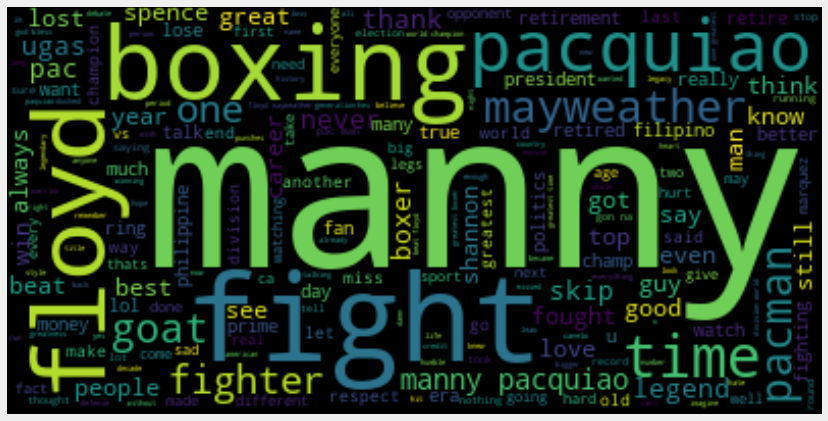

In [33]:
text = df['Clean Content'].tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

plt.figure(figsize=(13, 10))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [42]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Clean Content'].map(vadersentimentanalysis)


In [43]:
df.head()

,Author,Comment Posted,Like,Clean Content,Sentiment
0,legendary351,1 week ago,60,What legend Glad era,0.4588
1,redghettosun,1 week ago,32,The Last True Greats You ca make story like Ma...,0.7964
2,Hassan Abykhres,1 week ago,13,I glad I witnessed talent years living My Deep...,0.8074
3,Mansoor,1 week ago,11,Mannys pro boxer long time I checked boxer rec...,0.7783
4,Renz Caringal,1 week ago,16,15 2003 I first watched Manny vs Barrera I 7 y...,0.6369


In [44]:
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
df['Analysis'] = df['Sentiment'].map(vader_analysis)
df.head()


,Author,Comment Posted,Like,Clean Content,Sentiment,Analysis
0,legendary351,1 week ago,60,What legend Glad era,0.4588,Neutral
1,redghettosun,1 week ago,32,The Last True Greats You ca make story like Ma...,0.7964,Positive
2,Hassan Abykhres,1 week ago,13,I glad I witnessed talent years living My Deep...,0.8074,Positive
3,Mansoor,1 week ago,11,Mannys pro boxer long time I checked boxer rec...,0.7783,Positive
4,Renz Caringal,1 week ago,16,15 2003 I first watched Manny vs Barrera I 7 y...,0.6369,Positive


In [45]:
df.Analysis.value_counts()

Neutral     1072
Positive     523
Negative     197
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x26c102c7c10>,
 [Text(-0.36441203296222624, 1.1433301667638869, 'Neutral'),
  Text(-0.04048804815514058, -1.0992546192564248, 'Positive'),
  Text(1.0350471785765882, -0.3723940629503168, 'Negative')],
 [Text(-0.21257368589463194, 0.666942597278934, '59.8%'),
  Text(-0.022084389902803953, -0.5995934286853225, '29.2%'),
  Text(0.5645711883145026, -0.20312403433653642, '11.0%')])

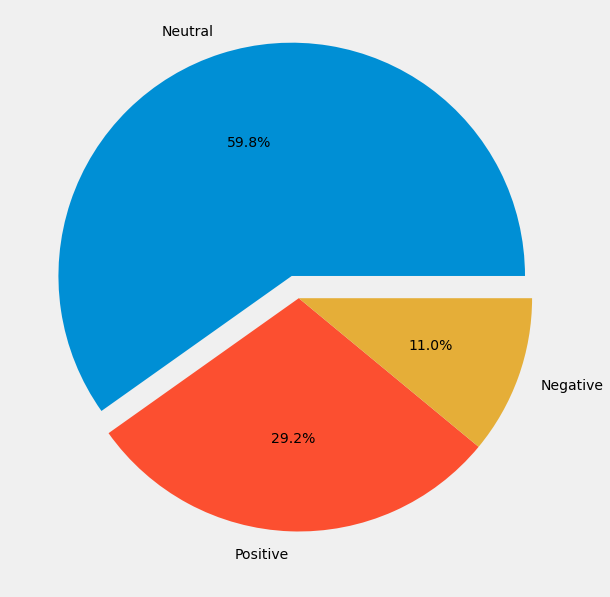

In [46]:
vader_counts= df['Analysis'].value_counts()
plt.figure(figsize=(13, 10))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)

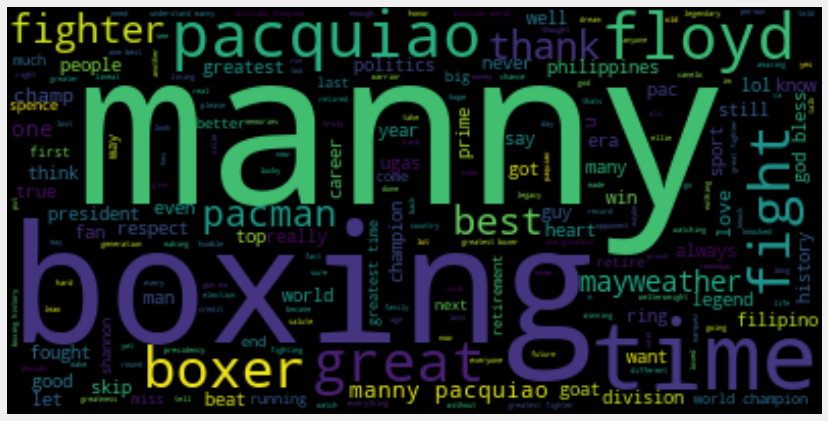

In [48]:
text = df[df.Analysis == 'Positive']['Clean Content'].tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

plt.figure(figsize=(13, 10))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [50]:
counter_obj = Counter(text.split())
top10 = pd.DataFrame(counter_obj.most_common(n=10), columns = ['Words', 'Frequency'])
top10.index += 1
top10

,Words,Frequency
1,manny,255
2,pacquiao,149
3,i,145
4,boxing,129
5,time,112
6,floyd,98
7,great,91
8,greatest,89
9,he,87
10,one,82


In [115]:
top = df['Clean Content'].loc[df.Sentiment >= 0.9]

In [116]:
y = 0
for top in top.sample(5):
    y += 1
    print(f'Top {y}: {top}\n')

Top 1: Manny gift He inspired us long fact always watched 1 fight review engineering assignment working student college time I learned love reading newspaper read boxing news library everyday going class floyd agreed fight fighter uncle jeff father floyd sr whispered ears pick person Thank Manny guiding light source inspiration

Top 2: Of course everything End Retirement including Careet Boxing But Nevertheless Manny Pacquiao IS A TRUE BOXING WARRIOR LIVING LEGEND BECAUSE HIS NOT A Cherry Picking Type Boxer exactly like Floyd Mayweather ONLY LEGACY IS HIS 0 Zero Loss Draw Wins Whereas PACQUIAO HAS World Boxing Title Different Weight Categories

Top 3: Manny successful boxer one richest He greatest times

Top 4: Pacquiao one truly great career first likely last eight division champion always came fight first ballot hof leaves behind great legacy many great fights I miss right time I wish look future

Top 5: It sad ended boxing career end solid one filipino fans world would never forget 

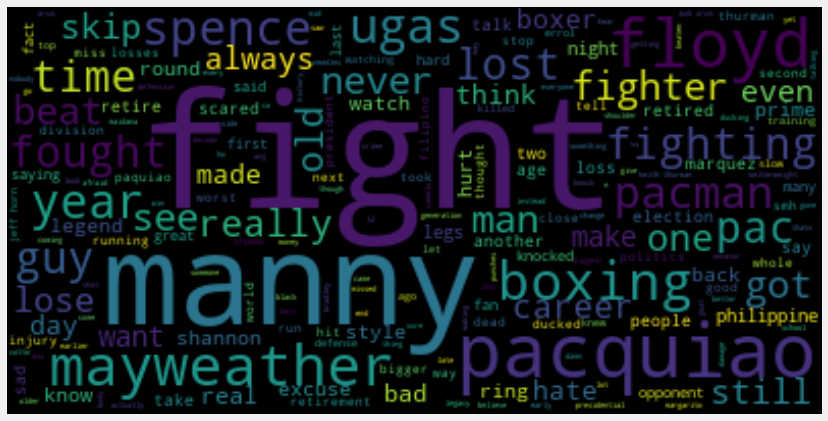

In [79]:
text = df[df.Analysis == 'Negative']['Clean Content'].tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

plt.figure(figsize=(13, 10))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [80]:
counter_obj = Counter(text.split())
top10 = pd.DataFrame(counter_obj.most_common(n=10), columns = ['Words', 'Frequency'])
top10.index += 1
top10

,Words,Frequency
1,fight,129
2,manny,91
3,pacquiao,73
4,floyd,59
5,he,52
6,i,49
7,mayweather,42
8,would,41
9,boxing,36
10,ugas,31


In [166]:
top = df['Clean Content'].loc[df.Sentiment <= -0.1]

In [167]:
y = 0
for top in top.sample(5):
    y += 1
    print(f'Top {y}: {top}\n')

Top 1: What idiotic way retire Losing fight running Presidency sovereign republic

Top 2: Blame circus manny around manny rest enough

Top 3: Bakit ba kasi nag politiko kapa

Top 4: You ca compare Manny Brady boxing much violent playing quarterback

Top 5: Spencer would killed dude fighting wan na kill knew fighting 42 year



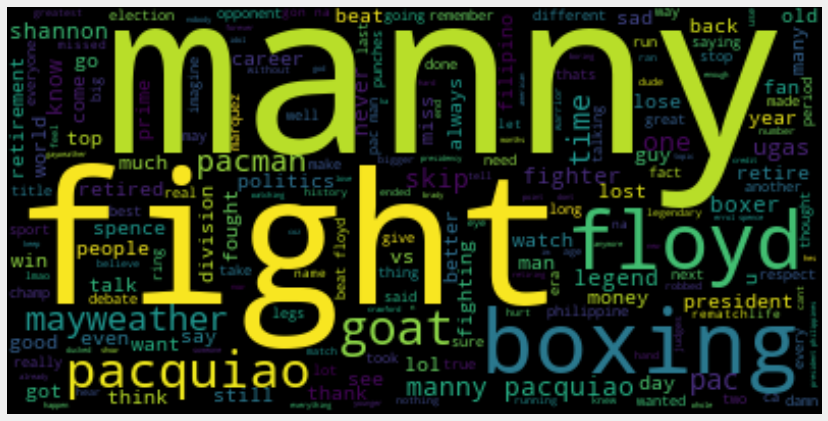

In [153]:
text = df[df.Analysis == 'Neutral']['Clean Content'].tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

plt.figure(figsize=(13, 10))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [154]:
counter_obj = Counter(text.split())
top10 = pd.DataFrame(counter_obj.most_common(n=10), columns = ['Words', 'Frequency'])
top10.index += 1
top10

,Words,Frequency
1,manny,325
2,pacquiao,169
3,floyd,157
4,boxing,155
5,i,149
6,fight,138
7,goat,105
8,he,104
9,mayweather,95
10,pac,75


In [183]:
top = df['Clean Content'].loc[df.Sentiment <= 0.5]

In [184]:
y = 0
for top in top.sample(5):
    y += 1
    print(f'Top {y}: {top}\n')

Top 1: GOAT

Top 2: Pacquio already say Ugas last fight win lose going retire

Top 3: I wan na floyd

Top 4: Manny fought fought fought Meanwhile Floyd ducked ducked ducked

Top 5: If Manny would took drug test would fought 5 years

